In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans

In [4]:
df = pd.read_excel('/Users/tema.fazly/Desktop/МИФИ/7 семестр/Домашова/1 Лабораторная/Исходные данные.xlsx', index_col = 'Наименование')
scaler = preprocessing.StandardScaler()
df.loc[:, 'X1':'X9'] = scaler.fit_transform(df.loc[:, 'X1':'X9'])
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9
Наименование,,,,,,,,,
Алтайский край,-0.749581,-0.510023,-0.230715,1.015370,1.594204,0.164717,0.067962,0.706939,-0.455673
Амурская область,-0.880585,0.689554,0.123652,1.060945,1.487592,1.883826,-0.405575,0.252205,1.277414
Архангельская область без автономного округа,-0.720000,1.161519,-0.141734,0.561209,-0.172228,0.138795,-0.540871,-0.267490,1.220404
Астраханская область,-0.267825,1.092691,-0.176769,-0.431375,-0.013732,-0.607581,0.560826,0.360475,-1.173992
Белгородская область,0.839370,-0.667344,-0.193043,-0.853474,-0.789570,0.221682,0.725114,-1.306881,-0.079411
...,...,...,...,...,...,...,...,...,...
Чеченская Республика,2.107150,-1.562110,-0.493613,-1.699263,-2.076138,-2.725381,-0.048006,1.573098,-1.972124
Чувашская Республика — Чувашия,-0.010043,0.384744,-0.422075,-0.280871,-0.732433,-1.159449,0.609146,0.577015,-0.695113
Чукотский автономный округ,-2.123010,3.010047,0.686012,2.102636,-1.703106,1.162364,-2.087112,-1.198611,3.101716


In [5]:
def pca_lambdas_with_intervals(data, confidence=0.95):

    # Вычисление матрицы ковариаций
    covariance_matrix = np.cov(data, rowvar=False)

    # Вычисление собственных значений и собственных векторов
    lambdas, eigenvectors = np.linalg.eig(covariance_matrix)

    # Сортировка собственных значений и векторов
    sorted_indices = np.argsort(lambdas)[::-1]
    sorted_lambdas = lambdas[sorted_indices]

    # Определение объема выборки
    n = data.shape[0]

    # Определение квантиля для доверительных интервалов
    alpha = 1 - confidence
    u_quantile = stats.norm.ppf(1 - alpha / 2)
    
    # Определение множителя
    multiplier = np.sqrt(2 / (n - 1))

    # Определение доверительных интервалов
    lower_bounds = sorted_lambdas / (1 + u_quantile * multiplier)
    upper_bounds = sorted_lambdas / (1 - u_quantile * multiplier)

    # Формирование DataFrame для представления результатов
    results = pd.DataFrame({
        'Предел 1': lower_bounds,
        'Собственные числа': sorted_lambdas,
        'Предел 2': upper_bounds
    })

    return results
  
pca_lambdas_with_intervals(df)

,Предел 1,Собственные числа,Предел 2
0,2.083790,2.713988,3.890626
1,1.313531,1.710781,2.452483
2,1.029073,1.340295,1.921374
3,0.751325,0.978548,1.402793
4,0.603723,0.786307,1.127206
5,0.446422,0.581433,0.833511
6,0.344007,0.448044,0.642292
7,0.275928,0.359376,0.515182
8,0.144630,0.188371,0.270038


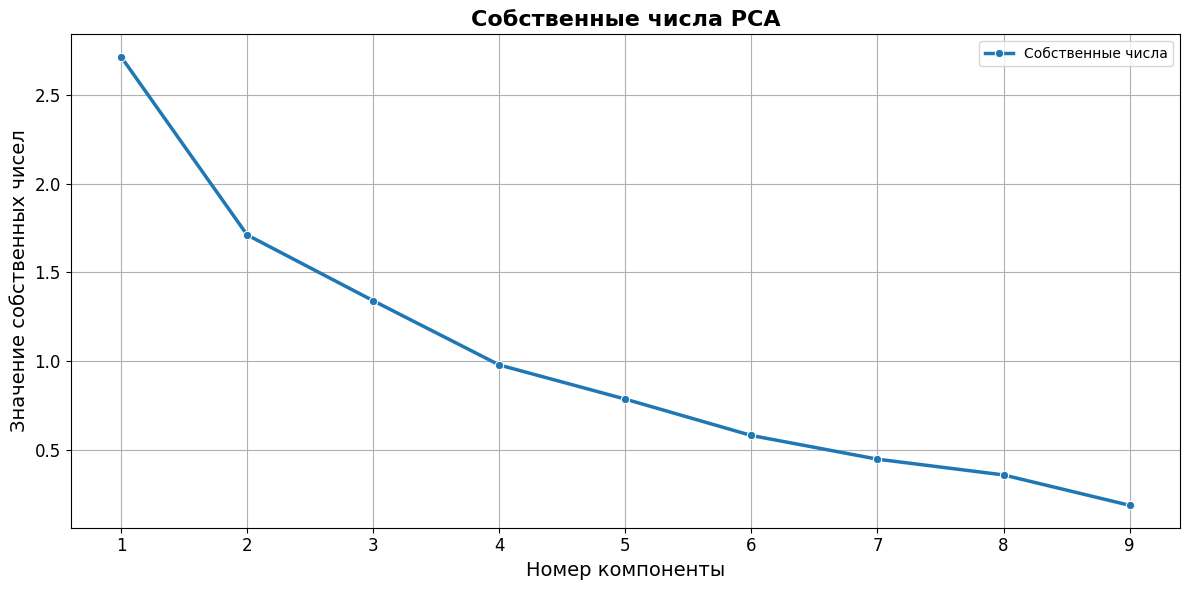

In [6]:
lambdas = pd.DataFrame(pca_lambdas_with_intervals(df)['Собственные числа'])
lambdas.index = list(range(1, len(lambdas) + 1))

plt.figure(figsize=(12, 6))
sns.lineplot(data=lambdas, marker='o', linewidth=2.5)


plt.title('Собственные числа PCA', fontsize=16, fontweight='bold')
plt.xlabel('Номер компоненты', fontsize=14)
plt.ylabel('Значение собственных чисел', fontsize=14)


plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

In [9]:
def perform_pca(df, n_components):
    # Стандартизируем данные
  

    # Проводим PCA
    pca = PCA(n_components=n_components)
    principalComponents = pca.fit_transform(df)

    # Получаем собственные значения
    eigenvalues = pca.explained_variance_

    # Создаем DataFrame для компонент
    principalDf = pd.DataFrame(data=principalComponents, 
                                columns=[f'principal component {i+1}' for i in range(n_components)],
                                index=df.index)

    # Создаем DataFrame для собственных значений
    eigenvalues_df = pd.DataFrame({'Eigenvalue': eigenvalues})
    eigenvalues_df['Component'] = [f'principal component {i+1}' for i in range(len(eigenvalues))]

    # Сортируем собственные значения
    sorted_eigenvalues_df = eigenvalues_df.sort_values(by='Eigenvalue', ascending=False)

    # Сортируем компоненты, чтобы соответствовать сортировке собственных значений
    sorted_components = sorted_eigenvalues_df['Component'].tolist()
    sorted_principalDf = principalDf[sorted_components]

    return sorted_principalDf, sorted_eigenvalues_df

# sorted_principalDf, sorted_eigenvalues_df = perform_pca(df, 9)
# principal_component = pd.DataFrame(sorted_principalDf)
# principal_component

pca = PCA(n_components=9)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data=principalComponents, 
                                columns=[f'principal component {i+1}' for i in range(9)],
                                index=df.index)
principalDf
pca.fit(df).plot_scree()

AttributeError: 'PCA' object has no attribute 'plot_scree'

In [ ]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)

principalDf = pd.DataFrame(data=principalComponents,
                           columns=[
                               f'principal component {i+1}' for i in range(3)],
                           index=df.index)

principalDf

,principal component 1,principal component 2,principal component 3
Наименование,,,
Алтайский край,0.922067,1.226453,-1.511187
Амурская область,2.812108,0.263421,-0.621818
Архангельская область без автономного округа,1.330470,-0.344359,0.528904
Астраханская область,-0.497255,-0.550097,-0.817784
Белгородская область,-1.101990,-1.343654,0.528064
...,...,...,...
Чеченская Республика,-4.974849,1.186022,0.434301
Чувашская Республика — Чувашия,-1.235774,-0.160226,-0.417817
Чукотский автономный округ,4.304606,-0.875248,2.738167


In [ ]:

def correlation_with_pca_sorted(df, n_components=None):

    # Применение PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(df)

    # Создание DataFrame для главных компонент
    principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

    # Вычисление матрицы корреляции
    correlation_matrix = pd.concat([df.reset_index(drop=True), principal_df.reset_index(drop=True)], axis=1).corr()

    # Извлечение корреляции главных компонент с оригинальными признаками
    pc_correlation = correlation_matrix.iloc[:df.shape[1], df.shape[1]:]

    # Сортировка по собственным значениям
    eigenvalues = pca.explained_variance_
    sorted_indexes = eigenvalues.argsort()[::-1]  # Индексы для сортировки по возрастанию
    sorted_pc_correlation = pc_correlation.iloc[:, sorted_indexes]

    return sorted_pc_correlation


correlation_with_pca_sorted(df, 9)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
X1,-0.767883,0.034914,0.241004,-0.178035,0.117213,0.421867,-0.204115,0.279845,0.087576
X2,0.501462,-0.554110,-0.011701,-0.326207,-0.424873,0.226971,-0.249939,-0.197875,0.035951
X3,0.407962,0.134609,0.644836,-0.534197,-0.035864,0.084084,0.288306,0.080575,-0.127666
X4,0.730474,0.507601,-0.077851,0.039887,-0.275441,-0.027085,0.042799,0.221091,0.271629
X5,0.489449,0.249135,-0.529373,-0.145781,0.441987,0.404852,0.106997,-0.159618,0.026455
X6,0.798240,-0.265906,-0.193254,0.002399,0.231228,-0.103242,-0.231923,0.328492,-0.170096
X7,-0.263518,-0.646367,-0.534505,0.011719,-0.233738,0.117707,0.338776,0.208799,-0.008986
X8,-0.233473,0.736601,-0.401548,-0.033271,-0.410189,0.119291,-0.076957,0.025727,-0.226919
X9,0.389077,-0.074699,0.420206,0.720741,-0.101188,0.356579,0.061129,-0.008533,-0.076163


In [ ]:
sorted_principalDf_3, sorted_eigenvalues_df_3 = perform_pca(df, 3)
principal_component_3 = pd.DataFrame(sorted_principalDf_3)
principal_component_3
df = pd.concat([df, principal_component_3], axis=1)
principal_component_3

,principal component 1,principal component 2,principal component 3
Наименование,,,
Алтайский край,0.922067,1.226453,-1.511187
Амурская область,2.812108,0.263421,-0.621818
Архангельская область без автономного округа,1.330470,-0.344359,0.528904
Астраханская область,-0.497255,-0.550097,-0.817784
Белгородская область,-1.101990,-1.343654,0.528064
...,...,...,...
Чеченская Республика,-4.974849,1.186022,0.434301
Чувашская Республика — Чувашия,-1.235774,-0.160226,-0.417817
Чукотский автономный округ,4.304606,-0.875248,2.738167


In [ ]:
def plot_dendrogram(data, method=None, threshold=None, figsize=(20, 12), 
                    leaf_font_size=10, threshold_color='red', threshold_style='--'):
    
    Z = linkage(data, method=method, optimal_ordering=True)
    
    plt.figure(figsize=figsize)
    dendrogram(Z, labels=data.index, leaf_font_size=leaf_font_size, color_threshold=threshold)
    
    
    plt.axhline(y=threshold, color=threshold_color, linestyle=threshold_style)
    plt.text(0, threshold + 0.5, f'Порог = {threshold}', color=threshold_color, fontsize=16, ha='left')

    plt.title(f'{method.capitalize()} метод')
    plt.xlabel('Объекты')
    plt.ylabel('Расстояние')
    plt.show()

In [ ]:
def cluster_data(data, method=None, n_clusters=None, threshold=None):

    if method != 'k-means':
        Z = linkage(data, method=method, optimal_ordering=True)

        if threshold is not None:
            cluster_labels = fcluster(Z, t=threshold, criterion='distance')
        elif n_clusters is not None:
            cluster_labels = fcluster(Z, t=n_clusters, criterion='maxclust')
        else:
            raise ValueError("Укажите либо threshold, либо n_clusters.")

    elif method == 'k-means':
        if n_clusters is None:
            raise ValueError(
                "Для метода k-means необходимо задать n_clusters.")
        clustering_model = KMeans(n_clusters=n_clusters)
        cluster_labels = clustering_model.fit_predict(data)

    return cluster_labels

In [ ]:
def clusters_values(df, method):
    clusters = {}

    for cluster, group in df.groupby(method):
        clusters[cluster] = group.index.tolist()

    for cluster, indices in clusters.items():
        print(f"Кластер {cluster}: {indices}")

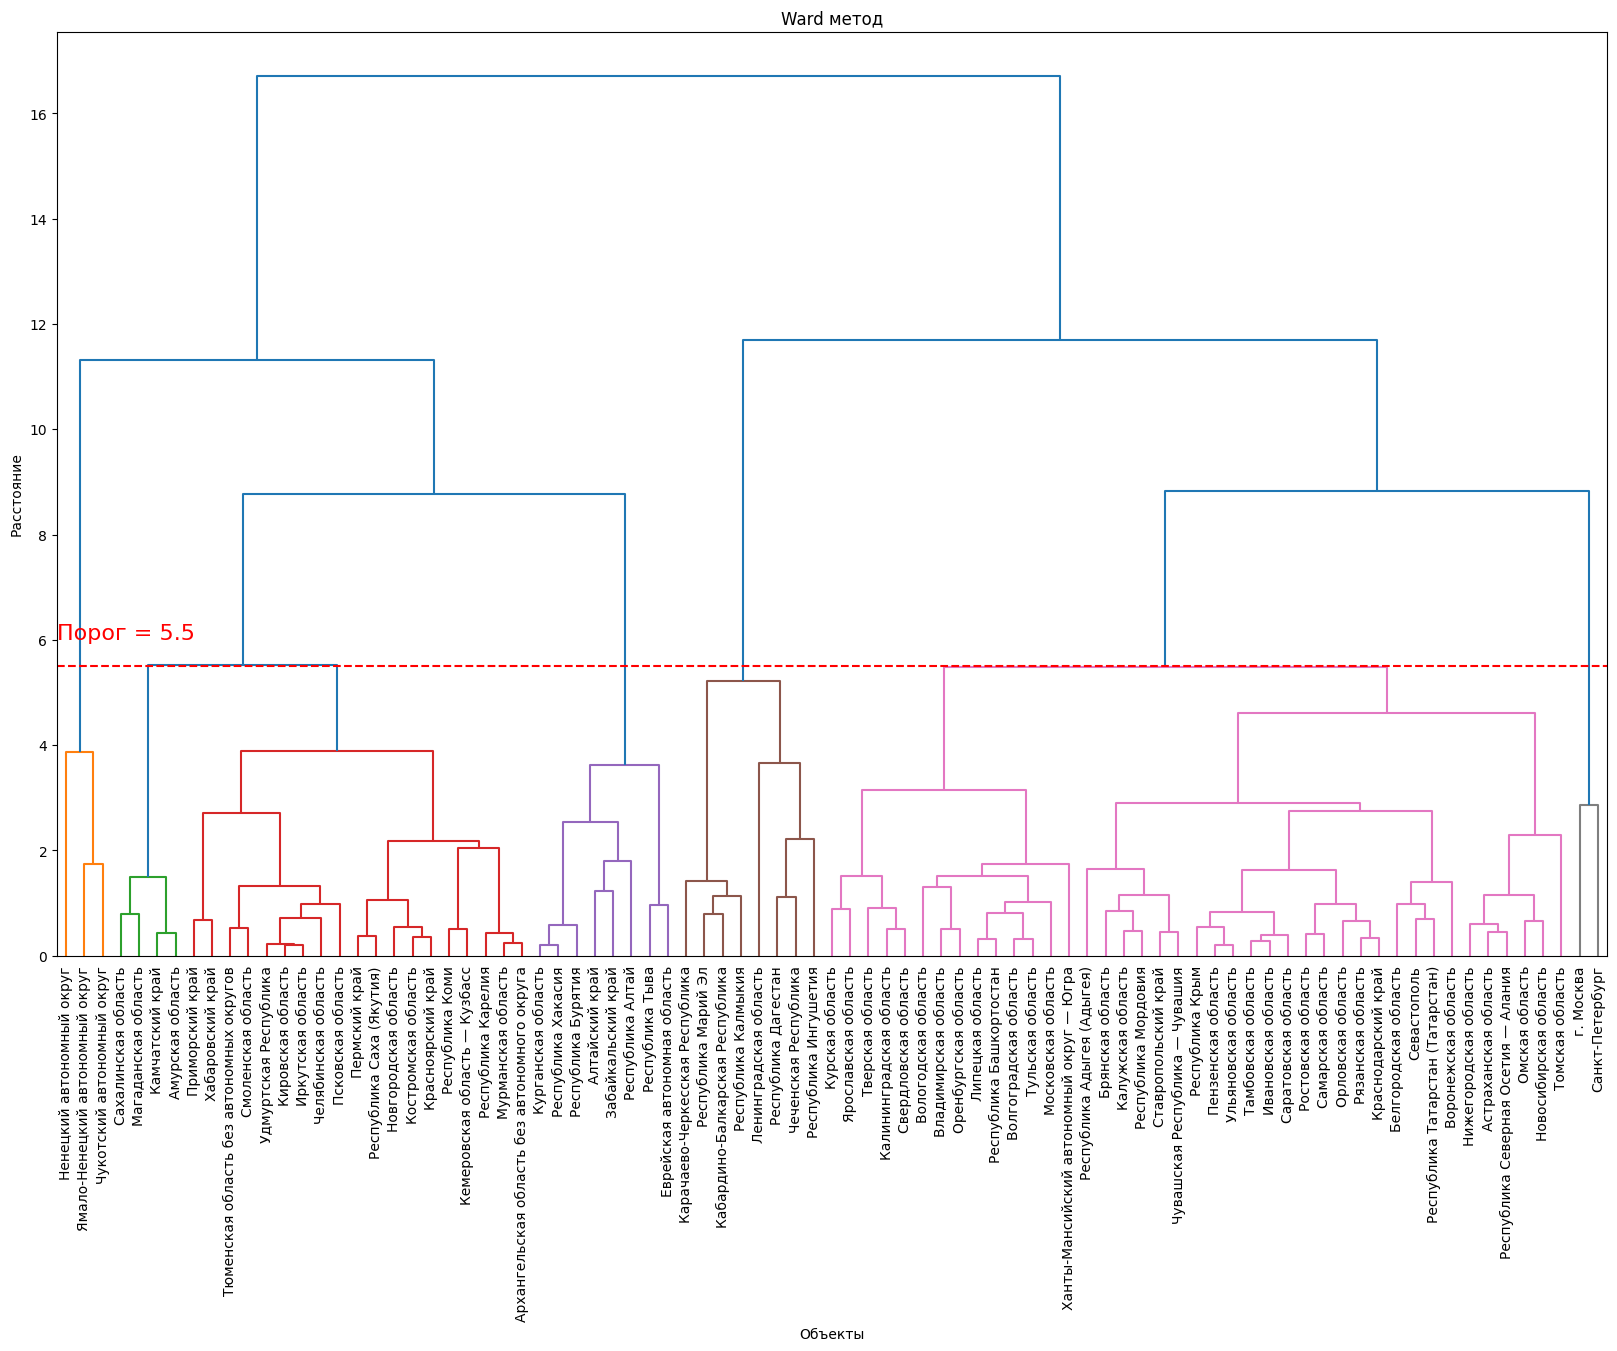

Кластер 1: ['Ненецкий автономный округ', 'Чукотский автономный округ', 'Ямало-Ненецкий автономный округ']
Кластер 2: ['Амурская область', 'Архангельская область без автономного округа', 'Камчатский край', 'Кемеровская область — Кузбасс', 'Костромская область', 'Красноярский край', 'Магаданская область', 'Мурманская область', 'Новгородская область', 'Пермский край', 'Приморский край', 'Республика Карелия', 'Республика Коми', 'Сахалинская область', 'Тамбовская область', 'Тверская область', 'Тюменская область без автономных округов', 'Удмуртская Республика', 'Хабаровский край', 'Челябинская область']
Кластер 3: ['Алтайский край', 'Еврейская автономная область', 'Забайкальский край', 'Курганская область', 'Республика Алтай', 'Республика Бурятия', 'Республика Тыва', 'Республика Хакасия']
Кластер 4: ['Кабардино-Балкарская Республика', 'Карачаево-Черкесская Республика', 'Республика Дагестан', 'Республика Ингушетия', 'Чеченская Республика']
Кластер 5: ['Брянская область', 'Владимирская область

,X1,X2,X3,X4,X5,X6,X7,X8,X9,principal component 1,principal component 2,principal component 3,ward МГК
Наименование,,,,,,,,,,,,,
Алтайский край,-0.749581,-0.510023,-0.230715,1.015370,1.594204,0.164717,0.089666,0.706939,-0.455673,0.922067,1.226453,-1.511187,3
Амурская область,-0.880585,0.689554,0.123652,1.060945,1.487592,1.883826,-0.370259,0.252205,1.277414,2.812108,0.263421,-0.621818,2
Архангельская область без автономного округа,-0.720000,1.161519,-0.141734,0.561209,-0.172228,0.138795,-0.501666,-0.267490,1.220404,1.330470,-0.344359,0.528904,2
Астраханская область,-0.267825,1.092691,-0.176769,-0.431375,-0.013732,-0.607581,0.568363,0.360475,-1.173992,-0.497255,-0.550097,-0.817784,6
Белгородская область,0.839370,-0.667344,-0.193043,-0.853474,-0.789570,0.221682,0.727929,-1.306881,-0.079411,-1.101990,-1.343654,0.528064,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Чеченская Республика,2.107150,-1.562110,-0.493613,-1.699263,-2.076138,-2.725381,-0.022969,1.573098,-1.972124,-4.974849,1.186022,0.434301,4
Чувашская Республика — Чувашия,-0.010043,0.384744,-0.422075,-0.280871,-0.732433,-1.159449,0.615294,0.577015,-0.695113,-1.235774,-0.160226,-0.417817,6
Чукотский автономный округ,-2.123010,3.010047,0.686012,2.102636,-1.703106,1.162364,-2.003460,-1.198611,3.101716,4.304606,-0.875248,2.738167,1


In [ ]:
plot_ward = plot_dendrogram(principal_component_3, method='ward', threshold=5.5)
df['ward МГК'] = cluster_data(df, n_clusters=7, method='ward')
clusters_values(df, method='ward МГК')
df

In [ ]:
df['k-means МГК'] = cluster_data(principal_component_3, n_clusters=7, method='k-means')
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,principal component 1,principal component 2,principal component 3,ward МГК,k-means МГК
Наименование,,,,,,,,,,,,,,
Алтайский край,-0.749581,-0.510023,-0.230715,1.015370,1.594204,0.164717,0.089666,0.706939,-0.455673,0.922067,1.226453,-1.511187,3,6
Амурская область,-0.880585,0.689554,0.123652,1.060945,1.487592,1.883826,-0.370259,0.252205,1.277414,2.812108,0.263421,-0.621818,2,2
Архангельская область без автономного округа,-0.720000,1.161519,-0.141734,0.561209,-0.172228,0.138795,-0.501666,-0.267490,1.220404,1.330470,-0.344359,0.528904,2,2
Астраханская область,-0.267825,1.092691,-0.176769,-0.431375,-0.013732,-0.607581,0.568363,0.360475,-1.173992,-0.497255,-0.550097,-0.817784,6,3
Белгородская область,0.839370,-0.667344,-0.193043,-0.853474,-0.789570,0.221682,0.727929,-1.306881,-0.079411,-1.101990,-1.343654,0.528064,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Чеченская Республика,2.107150,-1.562110,-0.493613,-1.699263,-2.076138,-2.725381,-0.022969,1.573098,-1.972124,-4.974849,1.186022,0.434301,4,0
Чувашская Республика — Чувашия,-0.010043,0.384744,-0.422075,-0.280871,-0.732433,-1.159449,0.615294,0.577015,-0.695113,-1.235774,-0.160226,-0.417817,6,3
Чукотский автономный округ,-2.123010,3.010047,0.686012,2.102636,-1.703106,1.162364,-2.003460,-1.198611,3.101716,4.304606,-0.875248,2.738167,1,4


In [ ]:
def function(df, method):

    mean_values = df.groupby(method).mean().add_suffix('_mean')
    mean_values
    df_new = df.merge(mean_values, left_on=method, right_index=True, )
    df_new.loc[:, 'X1':'X9'] = (df_new.loc[:, 'X1':'X9'].values - df_new.loc[:, 'X1_mean':'X9_mean'].values) ** 2
    df_new['L_2'] = (df_new.loc[:, 'X1':'X9'].sum(axis=1))
    df_new.groupby(method).sum('L_2')
    table_function = pd.DataFrame(df_new.groupby(method).sum('L_2')['L_2'])
    sum_function = df_new.groupby(method).sum('L_2')['L_2'].sum()
    
    print(f'Функционал качсетва {method}: {sum_function}')

In [ ]:
function(df, 'ward МГК')
function(df, 'k-means МГК')

Функционал качсетва ward МГК: 354.0968533906018
Функционал качсетва k-means МГК: 362.3019852178033
